In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv("data/StudentsPerformance.csv")

### Show top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset Information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no missing Values in the dataset**

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

**There are no duplicates in the dataset**

#### 3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of the Dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
* From the above statics we can infer that all the scores are close to each other -between 66 to 69
* All the standard deviations are close to each other between 14 to 16
* Minimum score of math score is 0 whereas the minimum score is higher for writing i.e 10 and reading is 17

#### 3.7 Exploring the Data 

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading score'] == 100]['average'].count()
writing_full=df[df['writing score'] == 100]['average'].count()
math_full=df[df['math score'] == 100]['average'].count()
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [22]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights:
* From the Above information we can infer that Students have performed worst in Math.
* Best Performance is in Reading

#### 4 Exploring Data(Visualization)
##### 4.1 Visualize average score distribution to make some conclusion   
* Histogram
* Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

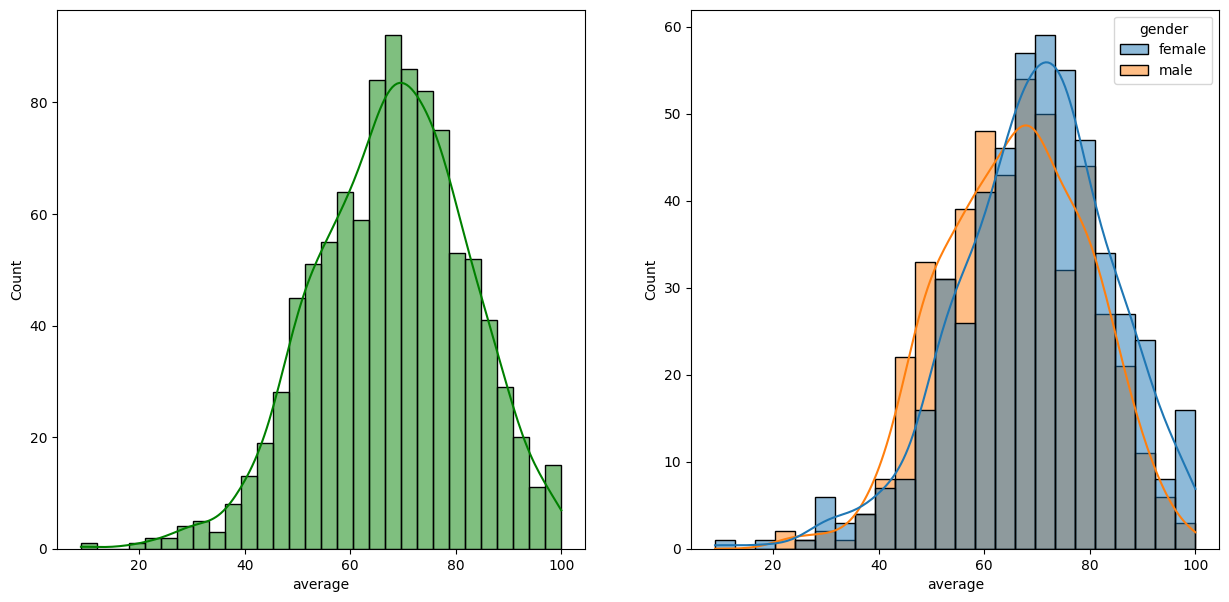

In [24]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True, hue='gender')
plt.show()


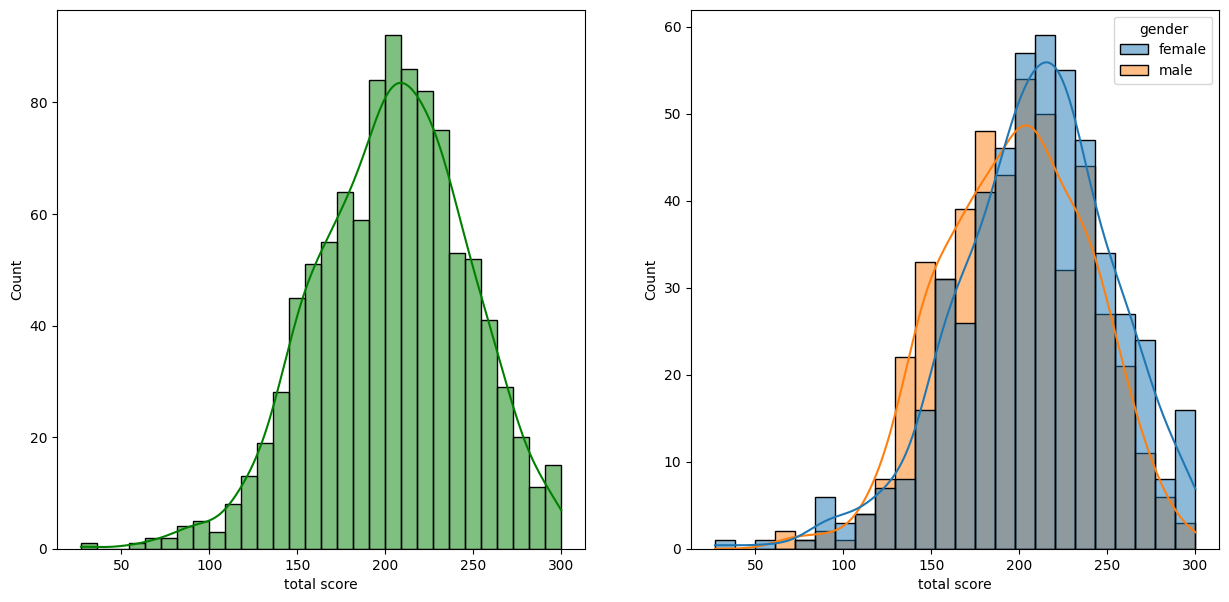

In [25]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True, hue='gender')
plt.show()

##### Insights
* Female students tend to perform well than male students

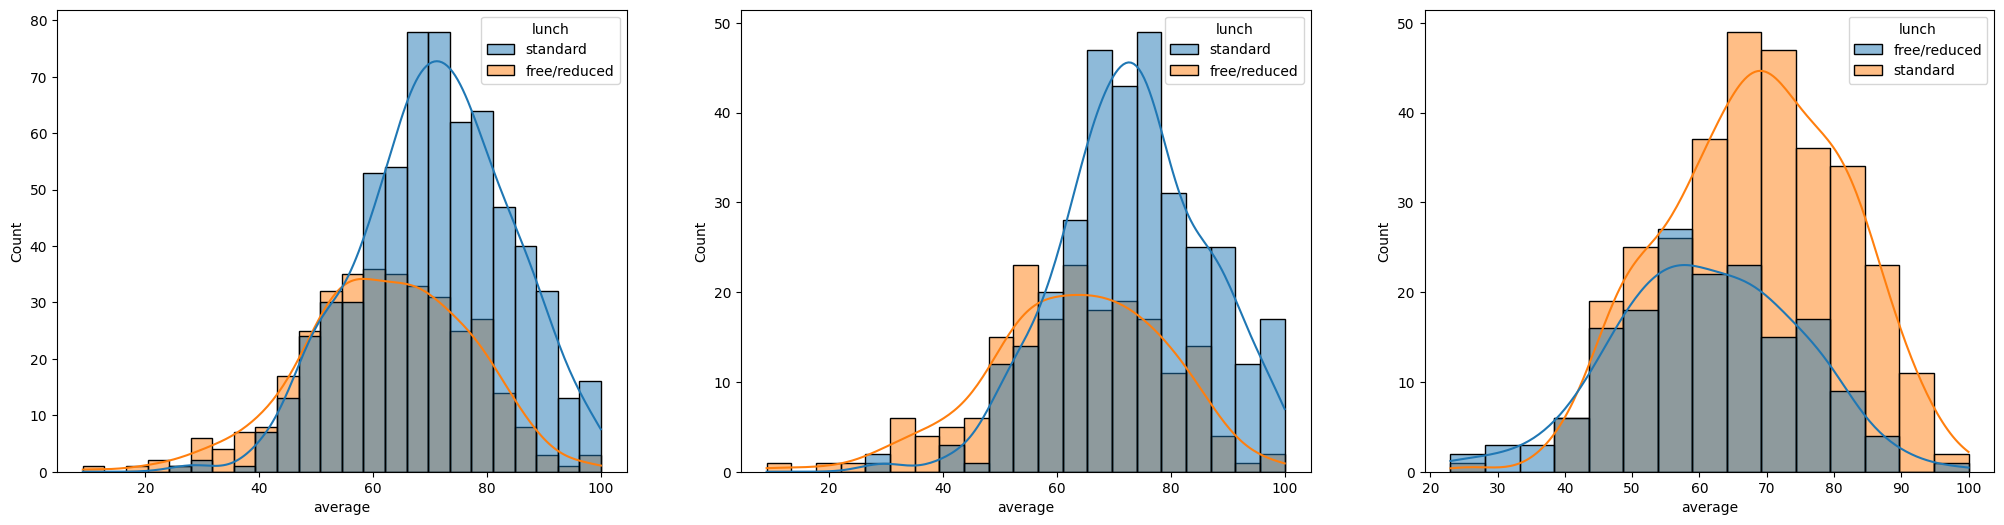

In [28]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='lunch')
plt.show()

#### Insights
* Overall students having standard lunch perform well compared to the students with Free/reduced lunch
* By gender wise too be it a male or female, standard lunch students perform well compared to the students with free/reduced lunch


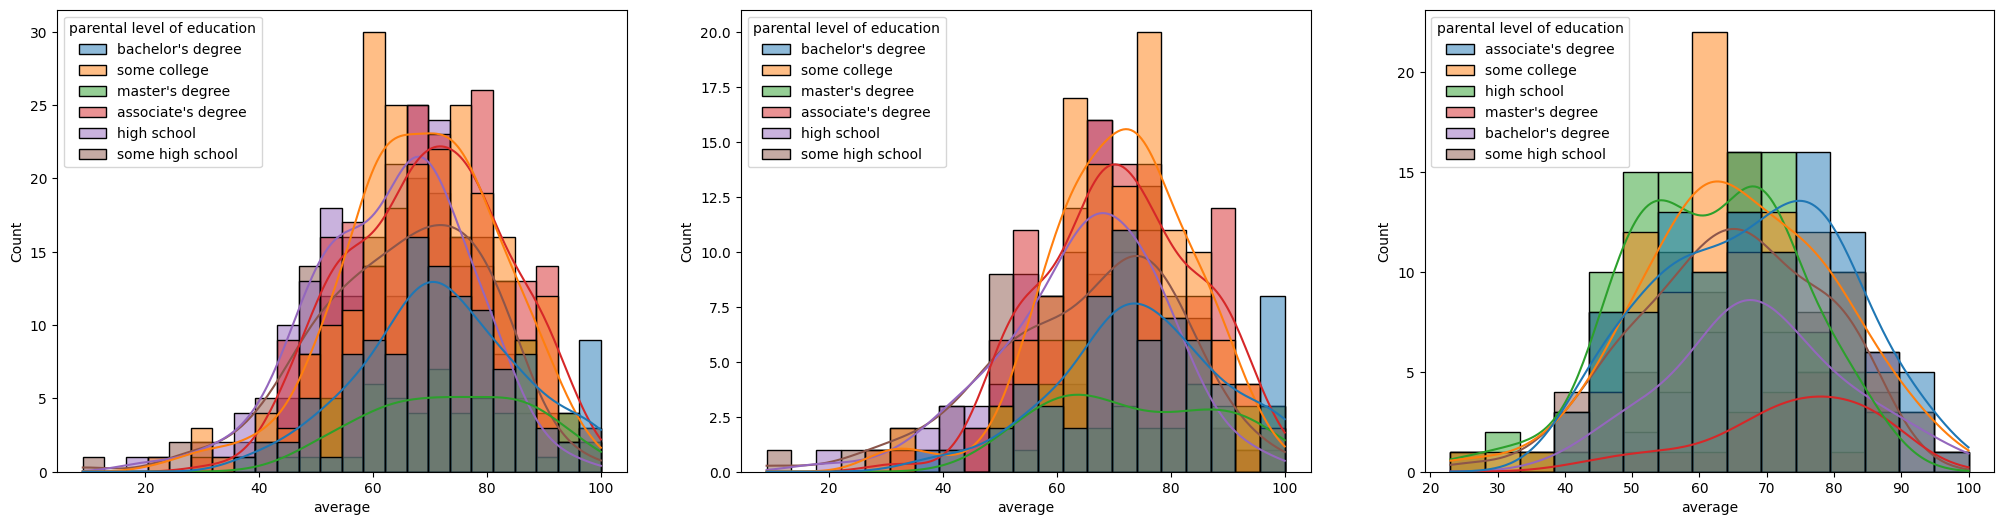

In [29]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='parental level of education')
plt.show()

#### Insights:
* As per the graph, we can infer that the parental education doesn't have greater impact for the students performance.

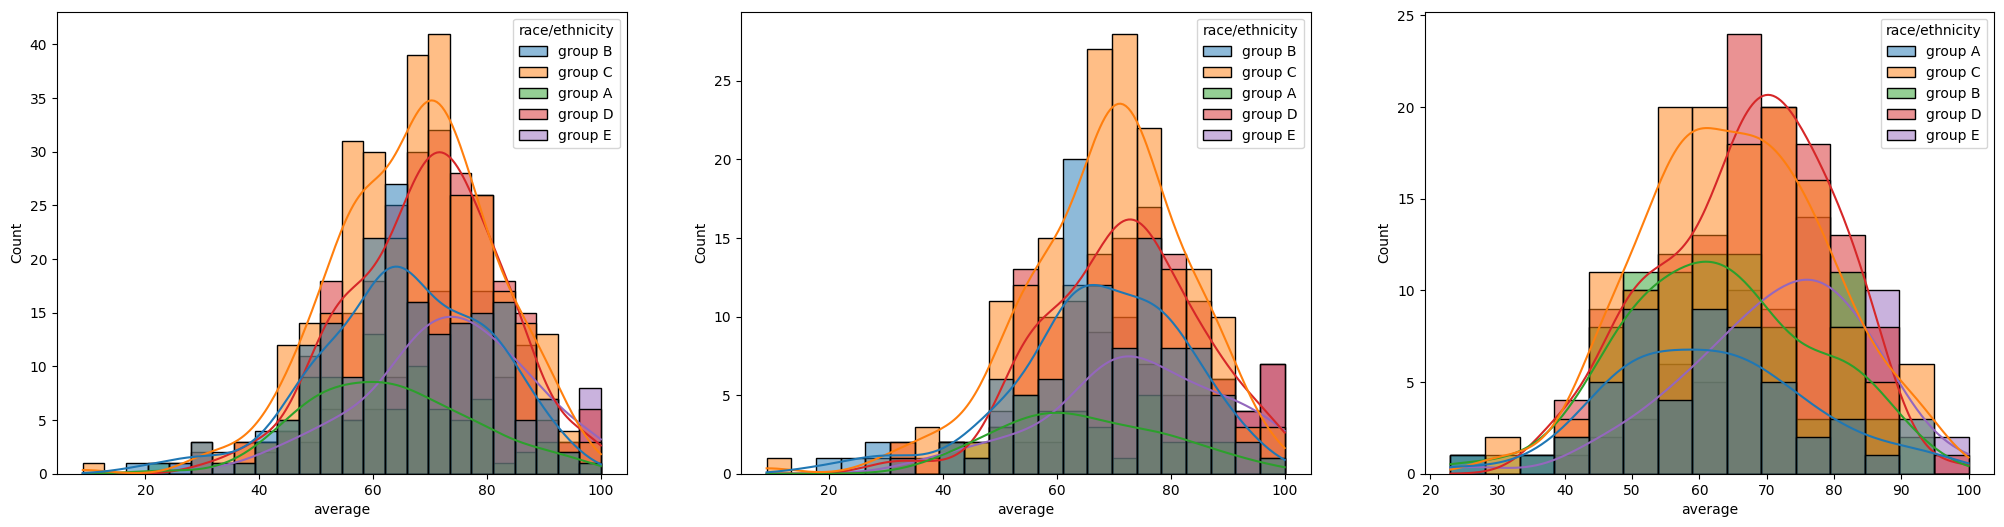

In [30]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True, hue='race/ethnicity')
plt.show()

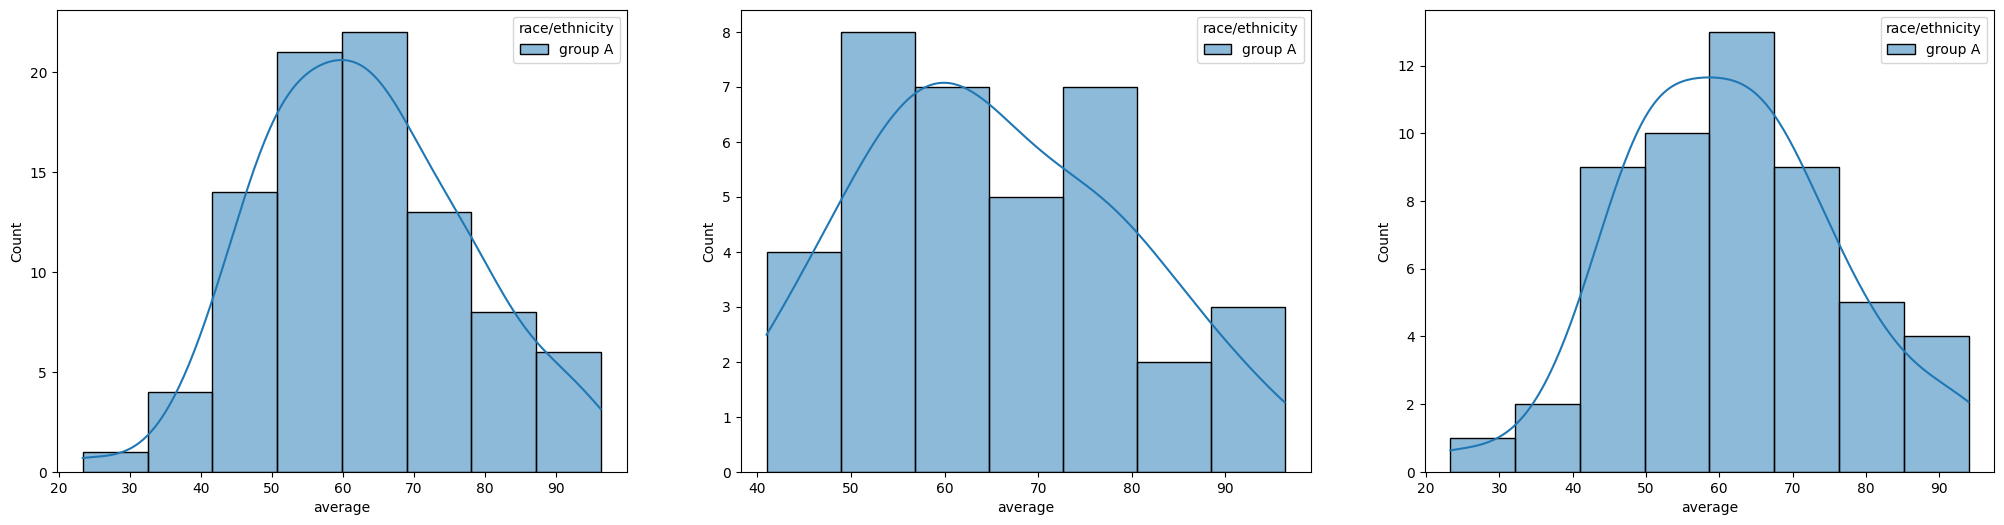

In [31]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df[df['race/ethnicity']=='group A'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[(df['gender']=='female')&(df['race/ethnicity']=='group A')],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[(df['gender']=='male')&(df['race/ethnicity']=='group A')],x='average',kde=True, hue='race/ethnicity')
plt.show()

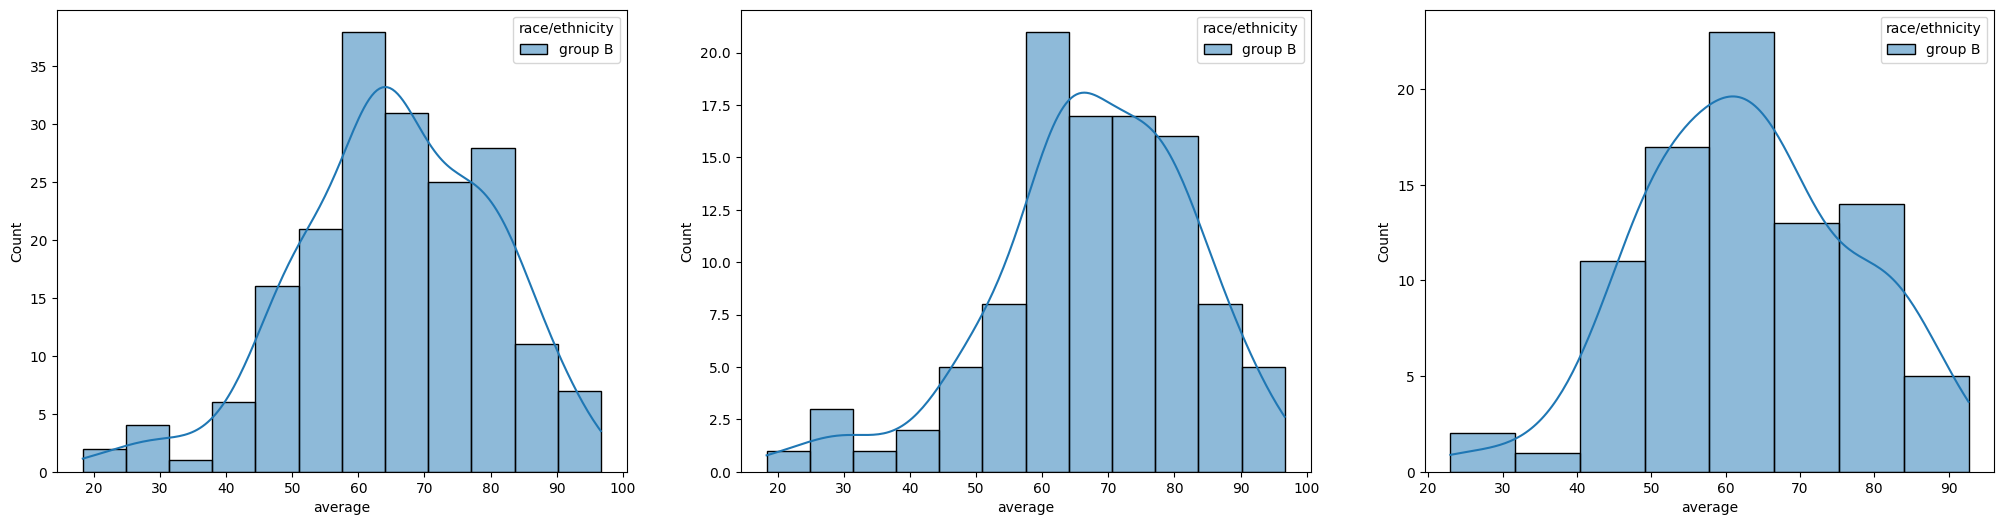

In [32]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df[df['race/ethnicity']=='group B'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[(df['gender']=='female')&(df['race/ethnicity']=='group B')],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[(df['gender']=='male')&(df['race/ethnicity']=='group B')],x='average',kde=True, hue='race/ethnicity')
plt.show()

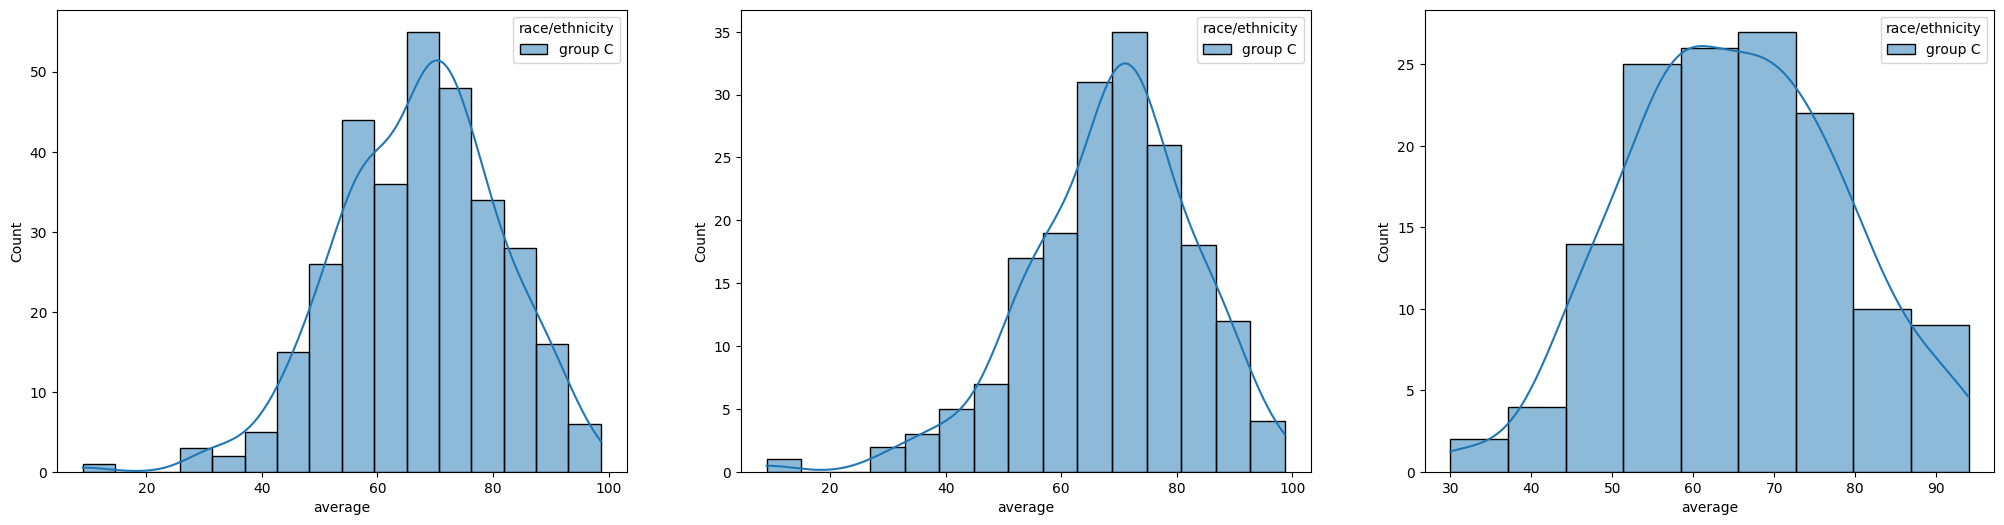

In [33]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df[df['race/ethnicity']=='group C'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[(df['gender']=='female')&(df['race/ethnicity']=='group C')],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[(df['gender']=='male')&(df['race/ethnicity']=='group C')],x='average',kde=True, hue='race/ethnicity')
plt.show()

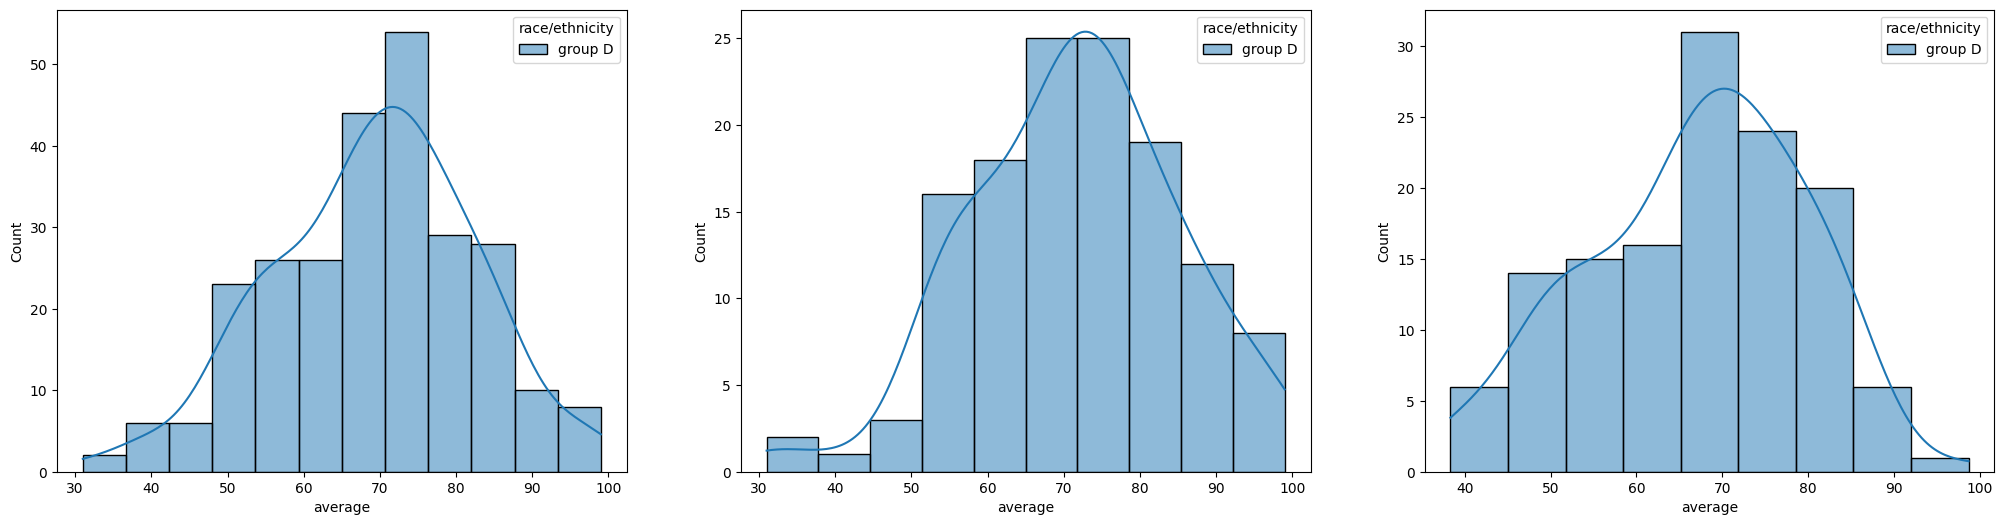

In [34]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df[df['race/ethnicity']=='group D'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[(df['gender']=='female')&(df['race/ethnicity']=='group D')],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[(df['gender']=='male')&(df['race/ethnicity']=='group D')],x='average',kde=True, hue='race/ethnicity')
plt.show()

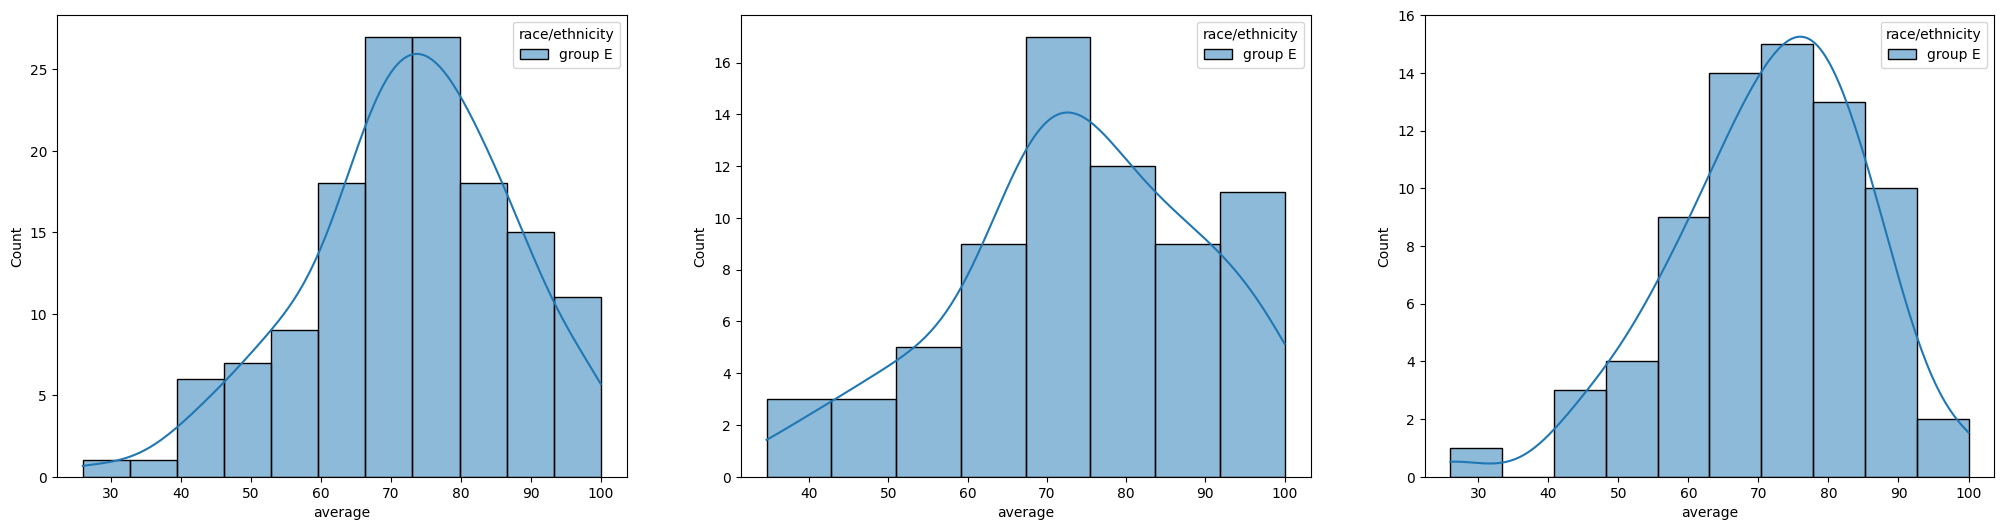

In [35]:
fig,axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df[df['race/ethnicity']=='group E'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[(df['gender']=='female')&(df['race/ethnicity']=='group E')],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[(df['gender']=='male')&(df['race/ethnicity']=='group E')],x='average',kde=True, hue='race/ethnicity')
plt.show()

#### Insights:
* As per the graph, we can infer that the Race or ethinicity doesn't have greater impact for the students performance.

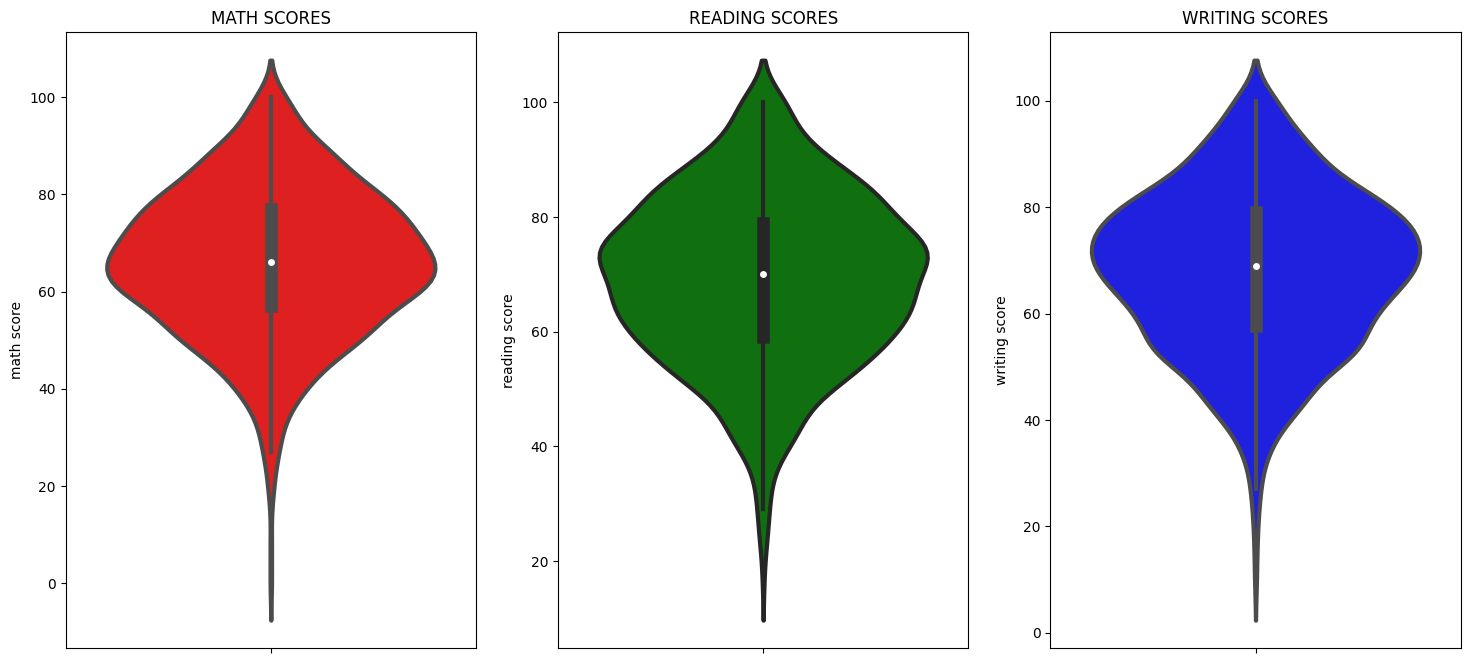

In [36]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

In [37]:
size=df['gender'].value_counts()
print(size)

gender
female    518
male      482
Name: count, dtype: int64


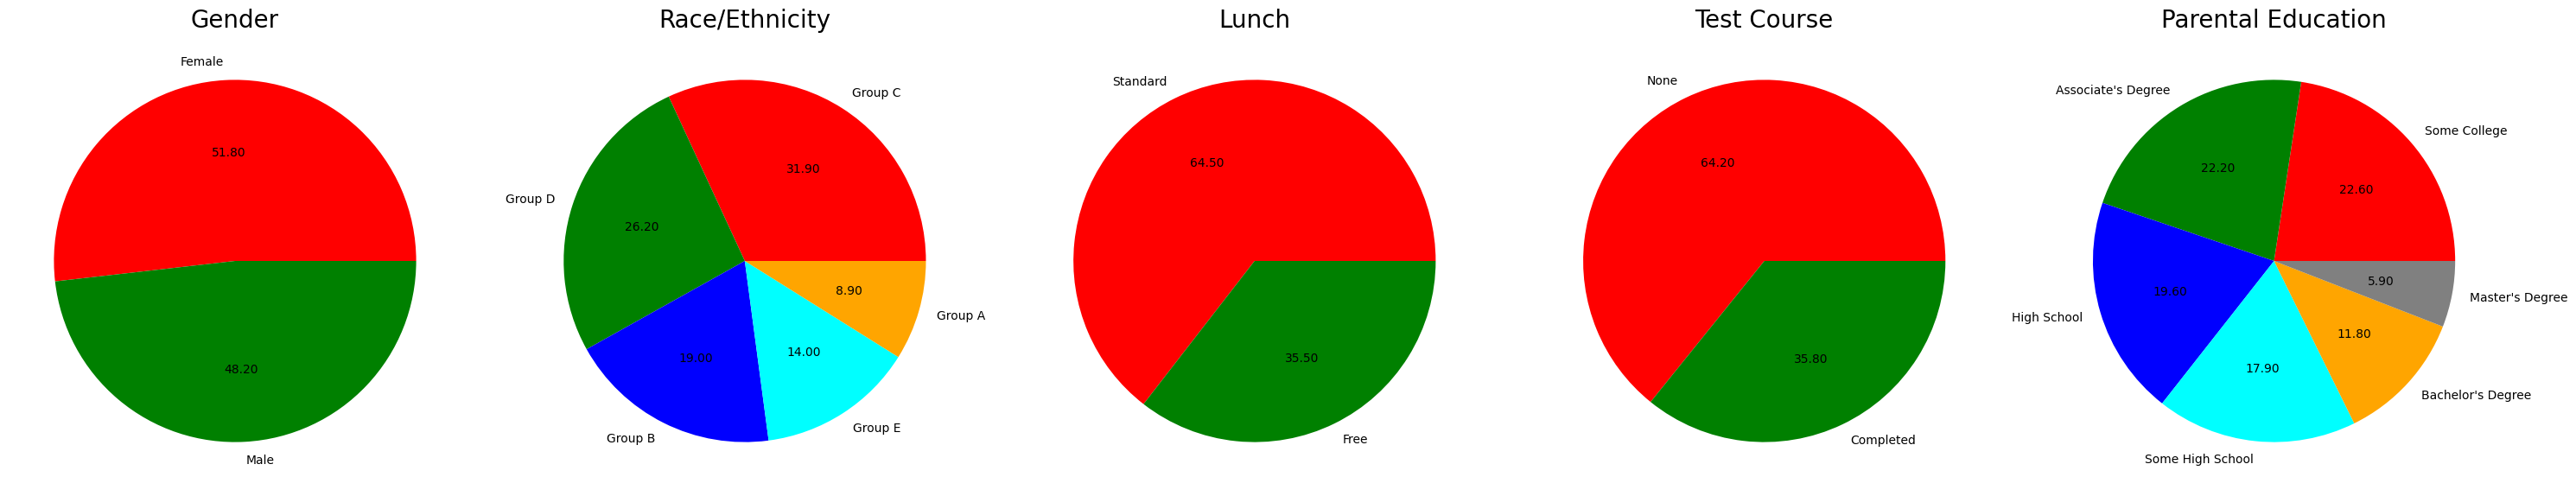

In [44]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['Female','Male']
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.2f')
plt.title("Gender",fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

##### Insights:
* Gender distribution is almost equal between Male and female.
* Students with Group C ethinicity is more followed by Group D and the rest of others
* Student with standard lunch is more compared to free Lunch
* Majority of the student did completed any test preparation course
* Student with parents education as "Associates degree" is fllowed by students with parents educationwith "some college".

#### 4.4 Feature wise Visualization
##### 4.4.1 Gender Column
* How is the distribution of Gender
* Is gender has any impact on students performance  


([<matplotlib.patches.Wedge at 0x231ad15a950>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

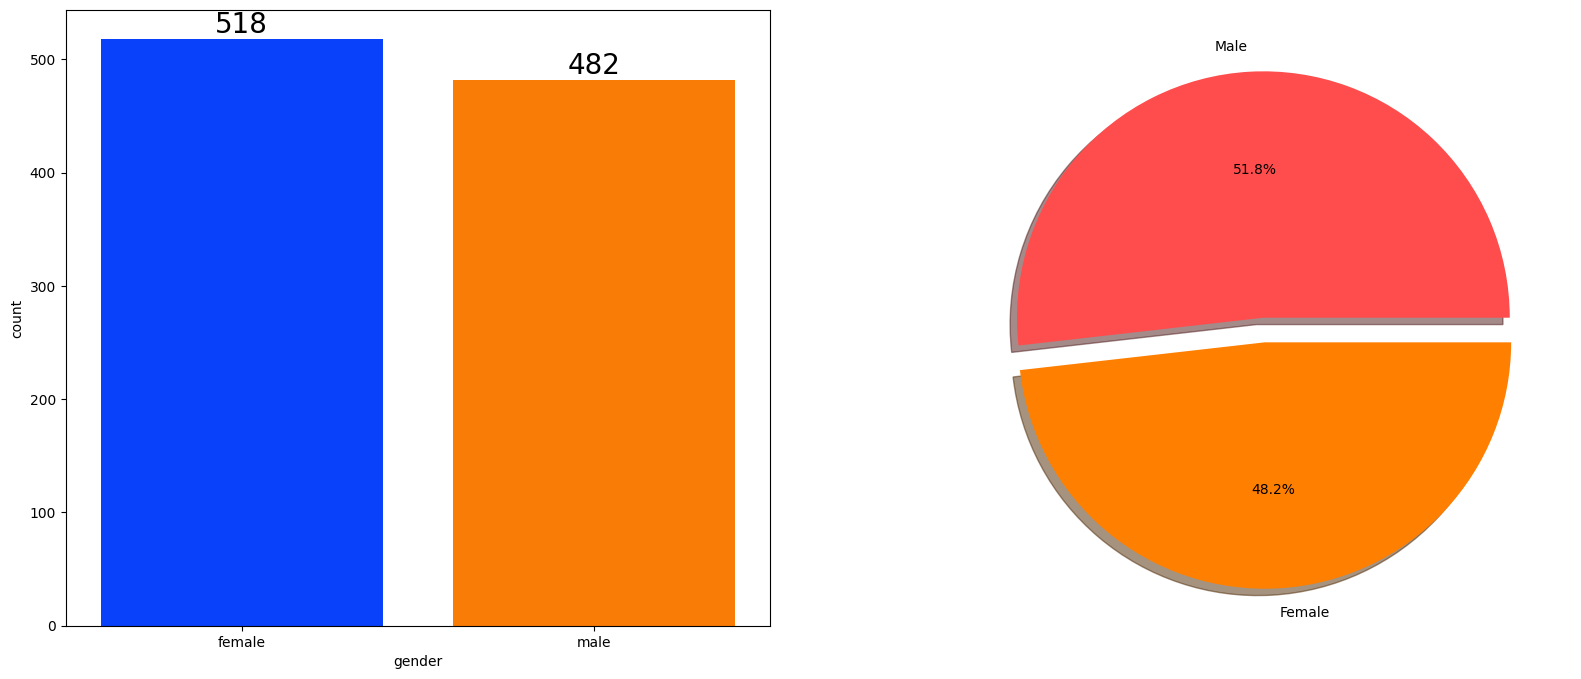

In [52]:
fig, ax= plt.subplots(1,2,figsize=(20,8))
sns.countplot(ax=ax[0],x=df['gender'],data=df,palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

##### Insights:
* Gender has balance data distribution between Male and Female students

#### Bivariate Analysis(Is Gender has any impact on students performance)

In [55]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

In [65]:
gender_group=df.groupby('gender')
gender_group

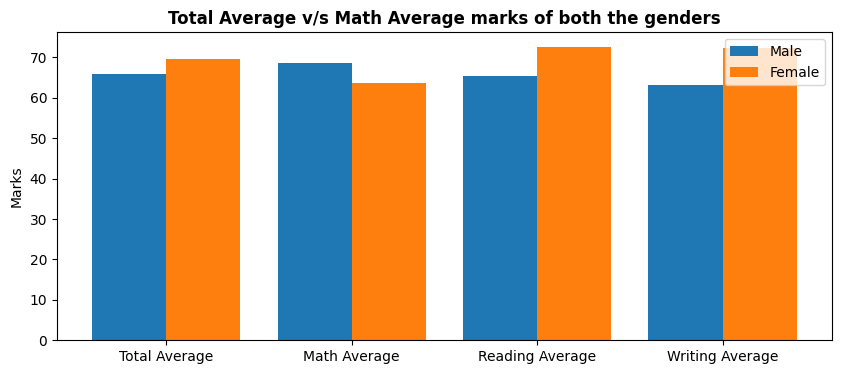

In [76]:
plt.figure(figsize=(10,4))
X=['Total Average','Math Average','Reading Average','Writing Average']
female_scores=[gender_group['average'].mean()[0],gender_group['math score'].mean()[0],gender_group['reading score'].mean()[0],gender_group['writing score'].mean()[0]]
male_scores=[gender_group['average'].mean()[1],gender_group['math score'].mean()[1],gender_group['reading score'].mean()[1],gender_group['writing score'].mean()[1]]
X_axis=np.arange(len(X))
plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total Average v/s Math Average marks of both the genders",fontweight ='bold')
plt.legend()

##### Insights:
* Overall female students performance is slightly higher than the male students.
* on comparision of individual score, female students takes the upper hand in Reading and writing whereas in math score male students performance is marginally high compared to the female student performance.